In [1]:
import pandas as pd
da=pd.read_csv('Happiness_index.csv')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np


In [3]:
da=da.dropna()
da.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [7]:
model = sm.OLS.from_formula("adjusted_satisfaction ~ GDP", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     adjusted_satisfaction   R-squared:                       0.571
Model:                               OLS   Adj. R-squared:                  0.567
Method:                    Least Squares   F-statistic:                     145.0
Date:                   Mon, 25 May 2020   Prob (F-statistic):           9.45e-22
Time:                           11:13:28   Log-Likelihood:                -389.19
No. Observations:                    111   AIC:                             782.4
Df Residuals:                        109   BIC:                             787.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4373      1.854     15.341      0.000      24.763      32.111
GDP           24.1029      2.002     12.042      0.000      20.136      28.070
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.825
Skew:                          -0.211   Prob(JB):                        0.662
Kurtosis:                       2.970   Cond. No.                         4.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
da.adjusted_satisfaction.std()

12.36413136745742

In [9]:
cc = da[["adjusted_satisfaction", "GDP"]].corr()
print(cc.adjusted_satisfaction.GDP**2)

0.5708982285520904


In [10]:
model2 = sm.OLS.from_formula("happyScore ~ GDP+adjusted_satisfaction", data=da)
result = model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             happyScore   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     283.4
Date:                Mon, 25 May 2020   Prob (F-statistic):           1.08e-43
Time:                        11:27:52   Log-Likelihood:                -73.761
No. Observations:                 111   AIC:                             153.5
Df Residuals:                     108   BIC:                             161.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.4698      0.193      7.613      0.000       1.087       1.852
GDP                       0.7748      0.179      4.327      0.000       0.420       1.130
adjusted_satisfaction     0.0677      0.006     12.065      0.000       0.057       0.079
==============================================================================
Omnibus:                        0.473   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.239
Skew:                          -0.106   Prob(JB):                        0.887
Kurtosis:                       3.082   Cond. No.                         236.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model3 = sm.OLS.from_formula("happyScore ~ GDP+income_inequality+avg_income", data=da)
result = model3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             happyScore   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 25 May 2020   Prob (F-statistic):           1.73e-27
Time:                        11:32:13   Log-Likelihood:                -109.51
No. Observations:                 111   AIC:                             227.0
Df Residuals:                     107   BIC:                             237.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.0329      0.378      8.019      0.000       2.283       3.783
GDP                   1.3758      0.280      4.914      0.000       0.821       1.931
income_inequality     0.0179      0.008      2.196      0.030       0.002       0.034
avg_income         8.438e-05   1.73e-05      4.885      0.000    5.01e-05       0.000
==============================================================================
Omnibus:                        1.187   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                1.218
Skew:                          -0.160   Prob(JB):                        0.544
Kurtosis:                       2.599   Cond. No.                     5.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
cc = da[["income_inequality", "GDP","avg_income"]].corr()
print(cc[["income_inequality","GDP","avg_income"]]**2)

                   income_inequality       GDP  avg_income
income_inequality           1.000000  0.091933    0.146373
GDP                         0.091933  1.000000    0.662636
avg_income                  0.146373  0.662636    1.000000


C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\sandbox\predict_functional.py:171: ValueWarning: 'region', 'country', 'country.1' in data frame but not in summaries or values.
  ValueWarning)


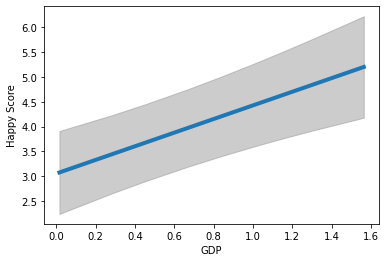

In [17]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"adjusted_satisfaction": 25, "avg_satisfaction": 1,
          "std_satisfaction": 1, "avg_income": 1, "median_income": 1,"income_inequality": 1}

pr, cb, fv = predict_functional(result, "GDP",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("GDP")
_ = ax.set_ylabel("Happy Score")

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\sandbox\predict_functional.py:171: ValueWarning: 'region', 'country', 'country.1' in data frame but not in summaries or values.
  ValueWarning)


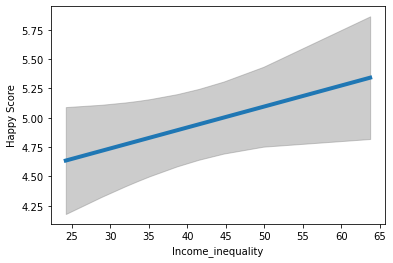

In [18]:
del values["income_inequality"]
values["GDP"]=0.85
pr, cb, fv = predict_functional(result, "income_inequality",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Income_inequality")
_ = ax.set_ylabel("Happy Score")

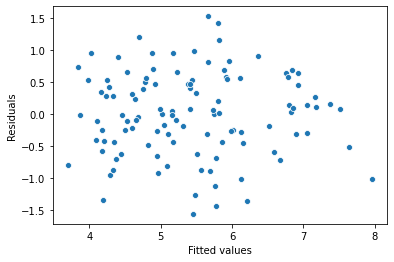

In [19]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

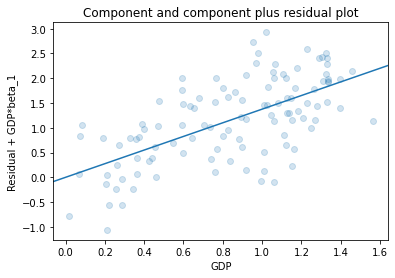

In [26]:
from statsmodels.graphics.regressionplots import plot_ccpr_grid

ax = plt.axes()
plot_ccpr(result,"GDP", ax)
_ = ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency

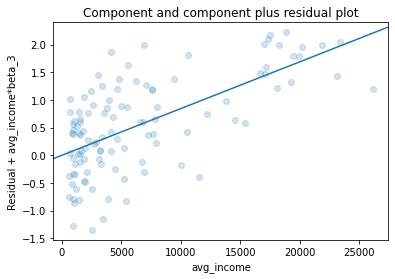

In [28]:
ax = plt.axes()
plot_ccpr(result,"avg_income", ax)
_ = ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency

In [7]:
da["hs"]=[i for i in da["happyScore"]>np.mean(da["happyScore"])]
da["hs"]=da["hs"].replace({False:0,True:1})
da["hs"]

0      0
1      0
2      1
3      1
4      1
      ..
106    1
107    0
108    0
109    0
110    0
Name: hs, Length: 111, dtype: int64

In [16]:
c = pd.crosstab(da.adjusted_satisfaction, da.hs).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:, 1] / c.loc[:, 0]
c

hs,0,1,odds
adjusted_satisfaction,,,
19.0,1.000000,0.000000,0.000000
20.0,1.000000,0.000000,0.000000
22.0,1.000000,0.000000,0.000000
25.0,1.000000,0.000000,0.000000
26.0,1.000000,0.000000,0.000000
27.0,1.000000,0.000000,0.000000
30.0,1.000000,0.000000,0.000000
32.0,1.000000,0.000000,0.000000
33.0,1.000000,0.000000,0.000000


In [24]:
c["logodds"] = np.log(c.odds)
cx=[(c["logodds"]>-1.7) & (c["logodds"]<4)]

In [25]:
model = sm.GLM.from_formula("hs ~ adjusted_satisfaction", family=sm.families.Binomial(), data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     hs   No. Observations:                  111
Model:                            GLM   Df Residuals:                      109
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33.080
Date:                Wed, 27 May 2020   Deviance:                       66.160
Time:                        23:02:13   Pearson chi2:                     78.2
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -14.4718      2.712     -5.336      0.000     -19.788      -9.156
adjusted_satisfaction     0.2887      0.054      5.333      0.000       0.183       0.395
=========================================================================================
"""

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\sandbox\predict_functional.py:171: ValueWarning: 'happyScore', 'country.1', 'region', 'country' in data frame but not in summaries or values.
  ValueWarning)


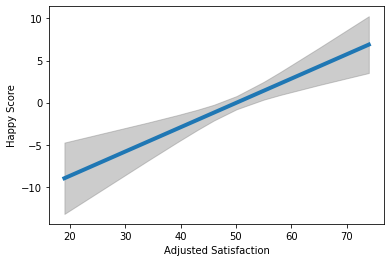

In [27]:
from statsmodels.sandbox.predict_functional import predict_functional
values = {"GDP": 25, "avg_satisfaction": 1,
          "std_satisfaction": 1, "avg_income": 1, "median_income": 1,"income_inequality": 1}
pr, cb, fv = predict_functional(result, "adjusted_satisfaction",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Adjusted Satisfaction")
_ = ax.set_ylabel("Happy Score")

Text(0, 0.5, 'Happy Score')

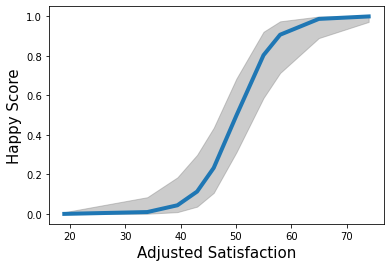

In [28]:
pr1 = 1 / (1 + np.exp(-pr))
cb1 = 1 / (1 + np.exp(-cb))
ax = sns.lineplot(fv, pr1, lw=4)
ax.fill_between(fv, cb1[:, 0], cb1[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Adjusted Satisfaction", size=15)
ax.set_ylabel("Happy Score", size=15)

NameError: name 'add_lowess' is not defined

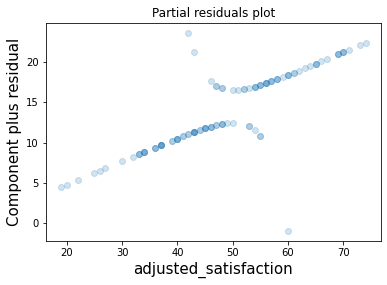

In [31]:
fig = result.plot_partial_residuals("adjusted_satisfaction")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)

_ = add_lowess(ax)